<a href="https://colab.research.google.com/github/Nikhil-C82/Brain-Tumour-Classification-Using-Inception-ResNet-V2/blob/master/Copy_of_Inception_ResNetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
np.random.seed(1337)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/New_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/1.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/2.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/3.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/4.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/5.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/6.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/7.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/8.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/9.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/10.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/11.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/12.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/13.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/14.jpg
/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/15.jpg
/content/drive/MyDrive/New_Dataset/Training/gliom

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#path_data = '../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset'
path_test = '/content/drive/MyDrive/New_Dataset/Testing'
path_data = '/content/drive/MyDrive/New_Dataset/Training'


path_test = pathlib.Path(path_test)
path_data = pathlib.Path(path_data)
print(path_data)

image_count = len(list(path_data.glob('*/*.jpg')))
print(image_count)
test_image_count = len(list(path_test.glob('*/*.jpg')))
print(test_image_count)

/content/drive/MyDrive/New_Dataset/Training
2864
394


/content/drive/MyDrive/New_Dataset/Training/glioma_tumor/2.jpg


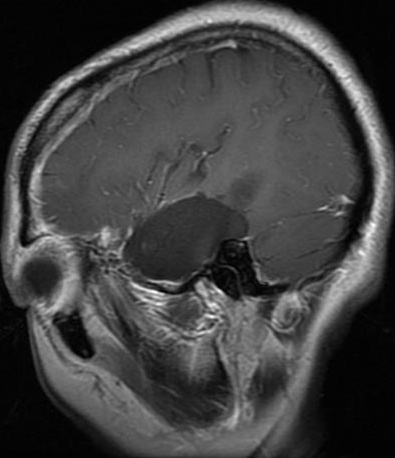

In [ ]:
tumors = list(path_data.glob('glioma_tumor/*'))
print(tumors[1])
img1 = PIL.Image.open(str(tumors[0]))
img1

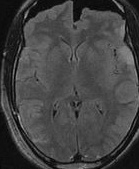

In [ ]:
not_tumors = list(path_data.glob('no_tumor/*'))
img2 = PIL.Image.open(str(not_tumors[0]))
img2

In [ ]:
img_opencv = cv2.imread(str(not_tumors[0]))
print(img_opencv.shape)
img_opencv1 = cv2.imread(str(tumors[0]))
print(img_opencv1.shape)

(169, 139, 3)
(458, 395, 3)


In [ ]:
batch = 32
img_height = 250
img_width = 250

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(
path_data,
validation_split = 0.2,
subset = 'training',
seed = 42,
image_size  =(img_height,img_width),
batch_size = batch)

Found 2864 files belonging to 4 classes.
Using 2292 files for training.


In [ ]:
val = tf.keras.preprocessing.image_dataset_from_directory(
path_data,
validation_split = 0.2,
subset = 'validation',
seed = 42,
image_size = (img_height,img_width),
batch_size = batch)

Found 2864 files belonging to 4 classes.
Using 572 files for validation.


In [ ]:
test = tf.keras.preprocessing.image_dataset_from_directory(
path_test,
seed = 42,
image_size = (img_height,img_width),
batch_size = batch)

Found 394 files belonging to 4 classes.


In [ ]:
print(train.class_names)
print(val.class_names)
print(test.class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


classes = train.class_names
plt.figure(figsize = (10,10))
for img,label in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classes[label[i]],
                  fontdict = {'fontsize': '19',
                              'color': 'white'}
                 )
        

classes = train.class_names
plt.figure(figsize = (10,10))
for img,label in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classes[label[i]],
                  fontdict = {'fontsize': '19',
                              'color': 'white'}
                 )

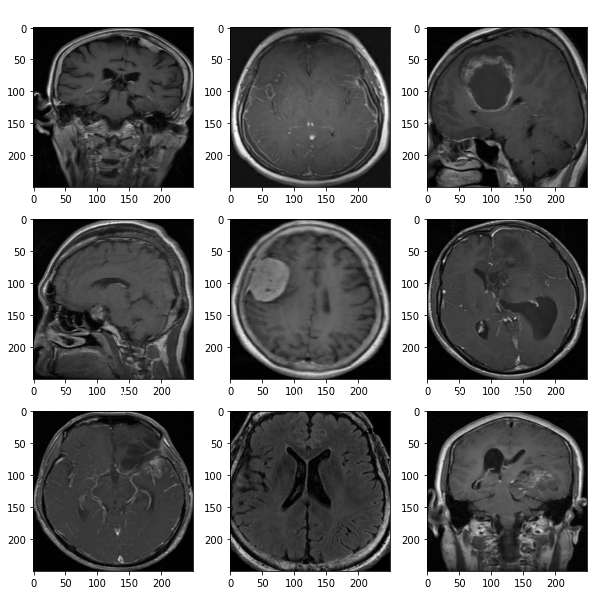

In [ ]:
classes = train.class_names
plt.figure(figsize = (10,10))
for img,label in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classes[label[i]],
                  fontdict = {'fontsize': '19',
                              'color': 'white'}
                 )

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.prefetch(buffer_size=AUTOTUNE)
val = val.prefetch(buffer_size=AUTOTUNE)
test = test.prefetch(buffer_size=AUTOTUNE)

In [ ]:
help(test.as_numpy_iterator())

Help on _NumpyIterator in module tensorflow.python.data.ops.dataset_ops object:

class _NumpyIterator(builtins.object)
 |  _NumpyIterator(dataset)
 |  
 |  Iterator over a dataset with elements converted to numpy.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataset)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __next__(self)
 |  
 |  next(self)



In [ ]:
def prediction_label_comparison(model,test):
    #Retrieve a batch of images from the test set
    image_batch, label_batch = test.as_numpy_iterator().next()
    prediction = model.predict_on_batch(image_batch).flatten()

    # Apply a sigmoid since our model returns logits
    predictions = tf.nn.sigmoid(prediction).numpy()

    n = 0
    predict = []
    while n<=(predictions.shape[0]-4):
        pred = np.argmax(predictions[n:n+4]) #Returns the index of the largest element in the selected subarray
        n+=4
        predict.append(pred)
    predict = np.array(predict)

    #print('Predictions:\n',predictions)#.numpy())
    print('Labels:\n', label_batch)
    print('Predictions:\n',predict)
    '''
    print(predictions.shape)
    print(label_batch.shape)
    print(predict.shape)
    '''

    plt.figure(figsize=(10, 10))
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(image_batch[i].astype("uint8"))
      plt.title(classes[predict[i]],fontdict = {'fontsize': '14',
                                  'color': 'white'})
      plt.axis("off")
    return label_batch , predict

In [ ]:
def test_tumor(list_test_path,model):
    # sunflower_url = 'https://'
    # sunflower_path = tf.keras.utils.get_file('name of file', origin=sunflower_url)
    for path_name in list_test_path:
        test_img_path = path_name


        test_image = tf.keras.preprocessing.image.load_img(
            test_img_path, target_size=(img_height, img_width)
        )
        test_array = tf.keras.preprocessing.image.img_to_array(test_image)
        test_array = tf.expand_dims(test_array, 0) # Create a batch

        predictions = model.predict(test_array)
        score = tf.nn.softmax(predictions[0])

        print(
            "This image most likely belongs to {} with a {:.2f} percent confidence."
            .format(classes[np.argmax(score)], 100 * np.max(score))
        )

In [ ]:
def csv_builder(path_data,label_names):
    df = pd.DataFrame(columns = ['images','labels'])
    for name in label_names:
        BASE_DIR = str(path_data)+'/'
        #train_folder_glioma = BASE_DIR+'glioma_tumor/'
        train_folder_name = BASE_DIR+name+'/'

        #train_annotation = BASE_DIR+'annotated_train_data/'

        files_in_train = sorted(os.listdir(train_folder_name))
        #files_in_annotated = sorted(os.listdir(train_annotation))

        image_names =[i for i in files_in_train]

        
        for x in image_names:
            df = df.append({'images':train_folder_name+str(x),'labels':name},ignore_index=True)
            #df = df.append({'images':str(x),'labels':name},ignore_index=True)

        #df['images']=[train_folder_glioma+str(x) for x in image_names]
        #df['labels']=[train_annotation+str(x) for x in images]
        #pd.to_csv('files_path.csv', header=None)
    return df

In [ ]:
def model_inputs(model2,train,val,test):
    num_classes = 4
    epochs = 15
    model2.fit(
        train,
        validation_data=val,
        epochs=epochs,
        #callbacks = callback,
        shuffle=False,
        verbose = 0
    )
    results = model2.evaluate(test)
    return results[0],results[1] , model

In [ ]:
def cross_validation(n_splits,final_csv,test_csv,img_width,img_height,model):
    final_loss = 0
    final_acc = 0

    '''
    Seperating a dataframe for testing data
    '''
    ##
    final_csv = final_csv.sample(frac=1)
    ##
    Y = final_csv[['labels']]
    n = len(Y)
    kf = KFold(n_splits = 5)
    #skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
    idg = ImageDataGenerator(#width_shift_range=0.1,
#                          height_shift_range=0.1,
#                          zoom_range=0.3,
#                          fill_mode='nearest',
#                          horizontal_flip = True,
                         rescale=1./255)
    
    
    
    
    print('Performing cross validation...')
    test = idg.flow_from_dataframe(test_csv,
                                       x_col = "images",
                                       y_col = "labels",
                                       class_mode = "sparse",
                                       shuffle = True,
                                      target_size = (img_width,img_height),
                                      verbose = 0)#,subset='validation')
#     test = tf.keras.preprocessing.image_dataset_from_directory(path_test,
#                                                                    seed = 42,
#                                                                    image_size = (img_height,img_width),
#                                                                    batch_size = 32)

    for train_index, val_index in kf.split(np.zeros(n),Y):
        training_data = final_csv.iloc[train_index]
        validation_data = final_csv.iloc[val_index]
        train = idg.flow_from_dataframe(training_data,
                                        x_col = "images",
                                        y_col = "labels",
                                        class_mode = "sparse",
                                        shuffle = True,
                                        subset='training',
                                       target_size = (img_width,img_height),
                                       verbose = 0)
        val = idg.flow_from_dataframe(validation_data,
                                      x_col = "images",
                                      y_col = "labels",
                                      class_mode = "sparse",
                                      shuffle = True,
                                      target_size = (img_width,img_height),
                                      verbose = 0)
        
        '''                             	
        Passing the preprocessed data for model training
        '''
        loss,acc,returned_model = model_inputs(model,train,val,test)
        final_loss += loss
        final_acc += acc
    return final_loss/n_splits , final_acc/n_splits , returned_model
   

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
conv_layer_32 = tf.keras.layers.Conv2D(32,(3,3),activation='relu')
conv_layer_64 = tf.keras.layers.Conv2D(64,3,activation='relu')
conv_layer_16 = tf.keras.layers.Conv2D(16,3,activation='relu')
max_pool = tf.keras.layers.MaxPooling2D()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    normalization_layer,
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    #tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    #tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),
    #tf.keras.layers.experimental.preprocessing.RandomCrop(170,170)  
  ]
)

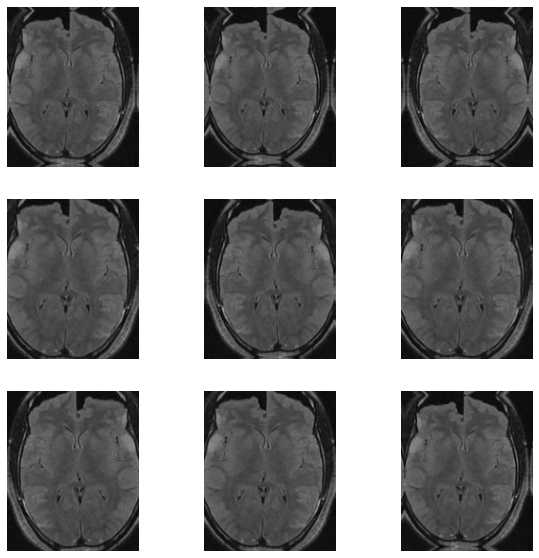

In [ ]:
plt.figure(figsize=(10, 10))
img_array = tf.keras.preprocessing.image.img_to_array(img_opencv)
img_array = tf.expand_dims(img_array,0)
for i in range(9):
  augmented_image = data_augmentation(img_array)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
num_classes = 4

model1 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
history = model1.fit(
    train,
    validation_data=val,
    epochs= 3,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/3
72/72 [==============================] - 262s 4s/step - loss: 7.1778 - accuracy: 0.4180 - val_loss: 0.8556 - val_accuracy: 0.6731
Epoch 2/3
72/72 [==============================] - 119s 2s/step - loss: 0.5942 - accuracy: 0.7723 - val_loss: 0.5554 - val_accuracy: 0.7972
Epoch 3/3
72/72 [==============================] - 122s 2s/step - loss: 0.2127 - accuracy: 0.9346 - val_loss: 0.5140 - val_accuracy: 0.7990


In [ ]:
model1.save('model1.h5')

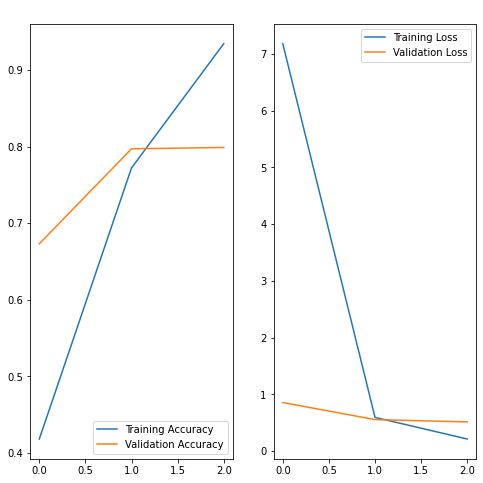

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               62980224  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                      

In [ ]:
results = model1.evaluate(test)
print("test loss, test acc:", results)

13/13 [==============================] - 44s 1s/step - loss: 1.5914 - accuracy: 0.6802
test loss, test acc: [1.5914151668548584, 0.6802030205726624]


In [ ]:
list_of_paths = ['/content/drive/MyDrive/New_Dataset/Testing/pituitary_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/no_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/meningioma_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/glioma_tumor/1.jpg']
test_tumor(list_of_paths,model1)

This image most likely belongs to pituitary_tumor with a 85.69 percent confidence.
This image most likely belongs to no_tumor with a 99.91 percent confidence.
This image most likely belongs to meningioma_tumor with a 89.87 percent confidence.
This image most likely belongs to no_tumor with a 98.38 percent confidence.


In [ ]:
labels_entire = []
pred_entire = []
for image_batch,label_batch in test.as_numpy_iterator():
    prediction = model1.predict_on_batch(image_batch).flatten()

    # Apply a sigmoid since our model returns logits
    predictions = tf.nn.sigmoid(prediction).numpy()

    n = 0
    predict = []
    while n<=(predictions.shape[0]-4):
        pred = np.argmax(predictions[n:n+4]) #Returns the index of the largest element in the selected subarray
        n+=4
        pred_entire.append(pred)
    for el in label_batch:
        labels_entire.append(el)
pred_entire = np.array(pred_entire)
labels_entire = np.array(labels_entire)
print(pred_entire)
print(labels_entire)

[1 1 1 0 2 2 1 3 1 1 1 2 2 1 1 1 0 1 1 1 3 3 2 1 1 1 2 2 1 3 3 2 1 2 1 3 3
 2 1 1 2 0 1 2 2 1 1 1 1 1 1 1 0 2 3 1 1 2 1 3 1 2 2 1 2 3 1 1 1 3 3 1 2 0
 1 1 3 1 3 0 1 1 1 1 1 1 3 2 2 1 3 0 1 1 2 1 2 1 3 2 2 3 1 1 0 1 1 3 1 1 0
 2 1 3 1 3 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 3 1 0 2 2 2 1
 2 3 2 3 2 2 1 3 2 2 1 1 3 2 3 1 1 1 1 2 1 1 1 1 2 1 1 2 0 1 3 2 1 1 2 1 0
 0 2 2 2 0 1 2 3 1 1 1 0 2 3 1 2 1 1 3 3 1 0 1 1 3 2 2 1 3 2 3 2 3 1 1 1 2
 2 2 2 2 3 1 1 1 1 1 3 2 2 2 1 1 3 3 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 2 3 2 1
 1 2 2 1 2 1 3 1 2 1 2 2 3 2 1 3 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 0 3 2 2 2 2
 0 1 1 3 1 1 2 3 2 2 1 1 1 1 2 2 3 1 2 2 3 2 0 2 1 3 1 1 2 1 2 3 1 1 1 1 0
 2 2 2 1 0 1 1 1 1 2 2 1 2 1 1 3 2 1 2 2 1 1 1 2 1 2 1 1 2 3 2 2 1 1 3 1 1
 1 1 2 2 2 3 1 3 1 3 2 3 1 3 1 2 2 2 2 2 1 1 1 0]
[2 0 1 0 2 2 1 3 1 1 3 0 2 1 1 0 0 1 0 0 3 3 1 2 2 1 2 2 1 3 3 2 1 2 1 3 3
 0 1 0 2 0 1 0 2 0 3 1 1 1 0 2 0 3 3 3 2 2 1 3 2 2 2 2 2 3 1 2 0 3 0 1 2 0
 1 0 1 1 3 0 1 1 1 1 1 1 3 2 2 1 3 1 3 3 2 1 0 1 3

In [ ]:
num_classes = 4

model2 = tf.keras.Sequential([
  #data_augmentation,
  normalization_layer,
  #tf.keras.layers.Conv2D(32,3,activation='relu'),
  conv_layer_32,
  layers.MaxPooling2D(pool_size=(2,2)),
  conv_layer_32,
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes,activation='softmax')
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 50
history = model2.fit(
  train,
  validation_data=val,
  epochs=epochs,
  callbacks = callback,
  shuffle=False)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


72/72 [==============================] - 99s 1s/step - loss: 1.0062 - accuracy: 0.5484 - val_loss: 0.6887 - val_accuracy: 0.7150
Epoch 2/50
72/72 [==============================] - 91s 1s/step - loss: 0.5712 - accuracy: 0.7784 - val_loss: 0.5686 - val_accuracy: 0.7885
Epoch 3/50
72/72 [==============================] - 108s 1s/step - loss: 0.3973 - accuracy: 0.8517 - val_loss: 0.4411 - val_accuracy: 0.8217
Epoch 4/50
72/72 [==============================] - 93s 1s/step - loss: 0.2614 - accuracy: 0.9132 - val_loss: 0.6251 - val_accuracy: 0.7587
Epoch 5/50
72/72 [==============================] - 91s 1s/step - loss: 0.1960 - accuracy: 0.9341 - val_loss: 0.3973 - val_accuracy: 0.8322
Epoch 6/50
72/72 [==============================] - 95s 1s/step - loss: 0.1420 - accuracy: 0.9511 - val_loss: 0.4910 - val_accuracy: 0.8007
Epoch 7/50
72/72 [==============================] - 90s 1s/step - loss: 0.1137 - accuracy: 0.9620 - val_loss: 0.5530 - val_accuracy: 0.7955
Epoch 8/50
72/72 [============

In [ ]:
model2.save('model2.h5')

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_2 (Dense)             (None, 32)               

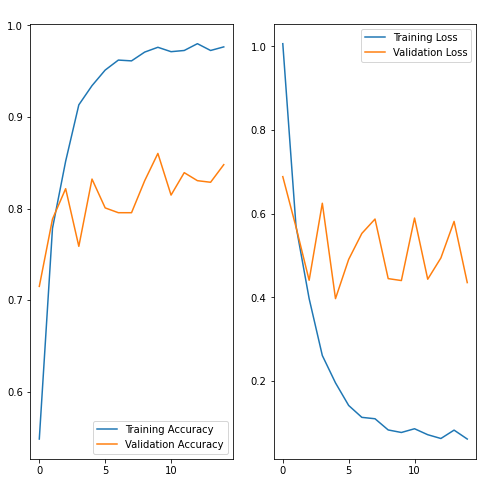

In [ ]:
eff_epochs = len(history.history['loss'])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [ ]:
results = model2.evaluate(test)
print("test loss, test acc:", results)

13/13 [==============================] - 6s 360ms/step - loss: 2.8154 - accuracy: 0.6904
test loss, test acc: [2.8153998851776123, 0.6903553009033203]


In [ ]:
list_of_paths = ['/content/drive/MyDrive/New_Dataset/Testing/pituitary_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/no_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/meningioma_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/glioma_tumor/1.jpg']
test_tumor(list_of_paths,model2)

This image most likely belongs to pituitary_tumor with a 47.41 percent confidence.
This image most likely belongs to no_tumor with a 47.53 percent confidence.
This image most likely belongs to meningioma_tumor with a 46.69 percent confidence.
This image most likely belongs to no_tumor with a 47.53 percent confidence.


In [ ]:
labels_entire = []
pred_entire = []
for image_batch,label_batch in test.as_numpy_iterator():
    prediction = model2.predict_on_batch(image_batch).flatten()

    # Apply a sigmoid since our model returns logits
    predictions = tf.nn.sigmoid(prediction).numpy()

    n = 0
    predict = []
    while n<=(predictions.shape[0]-4):
        pred = np.argmax(predictions[n:n+4]) #Returns the index of the largest element in the selected subarray
        n+=4
        pred_entire.append(pred)
    for el in label_batch:
        labels_entire.append(el)
pred_entire = np.array(pred_entire)
labels_entire = np.array(labels_entire)
print(pred_entire)
print(labels_entire)

[1 3 3 3 1 2 2 2 3 1 1 1 3 2 3 2 2 3 1 2 0 1 1 2 1 2 3 2 2 2 2 0 3 2 2 1 2
 3 2 2 1 3 1 2 2 1 1 3 1 1 2 1 0 1 3 3 1 2 1 2 2 0 1 1 2 2 3 2 2 0 2 2 1 1
 2 1 1 1 2 1 1 3 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 1 2 1 1 2 2 1 2 3 2 2 1 2 3
 2 2 2 3 1 1 2 1 2 2 1 3 1 2 2 0 3 3 3 3 2 1 1 2 2 3 1 2 1 1 0 2 2 0 2 3 1
 1 2 1 1 1 2 0 1 0 1 2 3 1 3 2 3 0 2 2 2 2 3 2 2 2 3 1 2 1 2 2 1 2 1 2 3 3
 2 1 2 1 1 0 2 3 1 2 2 1 2 1 2 1 1 2 1 3 1 2 2 1 2 1 1 2 3 2 1 3 2 1 2 1 2
 1 2 1 2 2 2 0 2 2 3 2 3 2 2 1 3 2 3 0 1 3 1 1 0 2 2 1 1 1 1 1 1 2 2 1 2 2
 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2 2 3 1 2 3 3 3 2 1 3 1 1 2 2 1 0 1 1 2 1 2
 1 0 2 1 2 1 3 3 3 1 2 2 0 1 2 1 2 3 1 3 1 1 3 1 2 2 1 2 1 0 1 2 2 2 2 3 1
 2 2 1 1 2 1 2 1 2 2 0 2 1 2 1 1 2 2 2 2 2 2 1 1 2 3 1 3 1 2 2 2 2 1 1 0 1
 2 3 1 3 2 2 1 2 1 1 2 2 0 1 2 1 2 1 2 3 1 1 1 0]
[2 3 3 3 1 1 0 3 0 1 1 1 3 2 3 3 0 3 0 2 0 1 1 1 0 2 3 2 2 2 2 0 3 2 2 1 0
 3 2 2 0 0 1 2 2 1 1 3 0 1 0 0 0 0 3 3 1 2 1 1 2 0 1 1 3 0 3 2 2 0 1 2 1 0
 2 1 1 1 2 1 1 3 2 1 3 2 0 0 1 3 0 3 0 3 0 2 2 1 3

In [ ]:
print(classification_report(labels_entire, pred_entire, target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.20      0.33       100
meningioma_tumor       0.71      0.90      0.79       115
        no_tumor       0.59      0.94      0.73       105
 pituitary_tumor       0.85      0.68      0.75        74

        accuracy                           0.69       394
       macro avg       0.76      0.68      0.65       394
    weighted avg       0.75      0.69      0.65       394



In [ ]:
image_size = (img_width,img_height)
IMG_SHAPE = image_size + (3,)
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [ ]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1536)


In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_394 (Conv2D)            (None, 124, 124, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_391 (Batch  (None, 124, 124, 32  96         ['conv2d_394[0][0]']             
 Normalization)                 )                                               

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1536)


In [ ]:
prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [ ]:
preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [ ]:
help(preprocess_input)

Help on function preprocess_input in module keras.applications.inception_resnet_v2:

preprocess_input(x, data_format=None)
    Preprocesses a tensor or Numpy array encoding a batch of images.
    
    Usage example with `applications.MobileNet`:
    
    ```python
    i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
    x = tf.cast(i, tf.float32)
    x = tf.keras.applications.mobilenet.preprocess_input(x)
    core = tf.keras.applications.MobileNet()
    x = core(x)
    model = tf.keras.Model(inputs=[i], outputs=[x])
    
    image = tf.image.decode_png(tf.io.read_file('file.png'))
    result = model(image)
    ```
    
    Args:
      x: A floating point `numpy.array` or a `tf.Tensor`, 3D or 4D with 3 color
        channels, with values in the range [0, 255].
        The preprocessed data are written over the input data
        if the data types are compatible. To avoid this
        behaviour, `numpy.copy(x)` can be used.
      data_format: Optional data format of the image

In [ ]:
inputs = tf.keras.Input(shape=(250, 250, 3))
#x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1536,activation='relu')(x)
outputs = prediction_layer(x)
model3 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
len(model3.trainable_variables)

4

In [ ]:
initial_epochs = 14

loss0, accuracy0 = model3.evaluate(val)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

18/18 [==============================] - 173s 7s/step - loss: 1.7446 - accuracy: 0.1923
initial loss: 1.74
initial accuracy: 0.19


In [ ]:
history_base = model3.fit(train,
                         epochs=initial_epochs,
                         validation_data=val,
                         shuffle=False
                        )

Epoch 1/14
72/72 [==============================] - 616s 8s/step - loss: 0.9147 - accuracy: 0.6265 - val_loss: 0.6983 - val_accuracy: 0.7185
Epoch 2/14
72/72 [==============================] - 606s 8s/step - loss: 0.6112 - accuracy: 0.7587 - val_loss: 0.5446 - val_accuracy: 0.8059
Epoch 3/14
72/72 [==============================] - 604s 8s/step - loss: 0.5273 - accuracy: 0.7949 - val_loss: 0.5011 - val_accuracy: 0.8182
Epoch 4/14
72/72 [==============================] - 627s 9s/step - loss: 0.4743 - accuracy: 0.8259 - val_loss: 0.5202 - val_accuracy: 0.8147
Epoch 5/14
72/72 [==============================] - 686s 10s/step - loss: 0.4333 - accuracy: 0.8333 - val_loss: 0.4603 - val_accuracy: 0.8374
Epoch 6/14
72/72 [==============================] - 687s 10s/step - loss: 0.4203 - accuracy: 0.8333 - val_loss: 0.4443 - val_accuracy: 0.8374
Epoch 7/14
72/72 [==============================] - 691s 10s/step - loss: 0.3998 - accuracy: 0.8464 - val_loss: 0.5489 - val_accuracy: 0.7972
Epoch 8/14

In [ ]:
model3.save('hybrid_model.h5')

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 250, 250, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 250, 250, 3)      0         
 bda)                                                            
                                                                 
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1536)             0         
 (GlobalAveragePooling2D)                                    

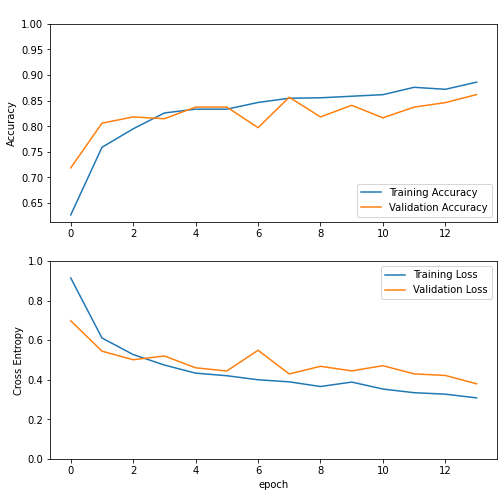

In [ ]:
acc = history_base.history['accuracy']
val_acc = history_base.history['val_accuracy']

loss = history_base.history['loss']
val_loss = history_base.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')


plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.xlabel('epoch')
plt.show()

In [ ]:
list_of_paths = ['/content/drive/MyDrive/New_Dataset/Testing/pituitary_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/no_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/meningioma_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/glioma_tumor/1.jpg']
test_tumor(list_of_paths,model3)

This image most likely belongs to pituitary_tumor with a 69.84 percent confidence.
This image most likely belongs to no_tumor with a 99.49 percent confidence.
This image most likely belongs to meningioma_tumor with a 68.74 percent confidence.
This image most likely belongs to meningioma_tumor with a 88.47 percent confidence.


In [ ]:
result = model3.evaluate(test)
print(result)

13/13 [==============================] - 147s 7s/step - loss: 0.9305 - accuracy: 0.7081
[0.9304907321929932, 0.7081218361854553]


In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

#Attempting to fine tune more layers
more_layer = 50



#Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  780


In [ ]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 250, 250, 3)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 250, 250, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 250, 250, 3)      0         
 bda)                                                            
                                                                 
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1536)             0         
 (GlobalAveragePooling2D)                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
len(model3.trainable_variables)

428

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model3.fit(train,
                         epochs=total_epochs,
                         initial_epoch=history_base.epoch[-1],
                         validation_data=val)

Epoch 14/24
72/72 [==============================] - 1818s 25s/step - loss: 0.2825 - accuracy: 0.8909 - val_loss: 0.3113 - val_accuracy: 0.8951
Epoch 15/24
72/72 [==============================] - 1779s 25s/step - loss: 0.1055 - accuracy: 0.9664 - val_loss: 0.2603 - val_accuracy: 0.9056
Epoch 16/24
72/72 [==============================] - 1789s 25s/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.2857 - val_accuracy: 0.9073
Epoch 17/24
72/72 [==============================] - 1769s 25s/step - loss: 0.0158 - accuracy: 0.9983 - val_loss: 0.2790 - val_accuracy: 0.9231
Epoch 18/24
72/72 [==============================] - 1754s 24s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2827 - val_accuracy: 0.9196
Epoch 19/24
72/72 [==============================] - 1789s 25s/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.3288 - val_accuracy: 0.9213
Epoch 20/24
72/72 [==============================] - 1839s 26s/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.3297 - val_accuracy:

In [ ]:
model3.save('Hybrid-model2.h5')

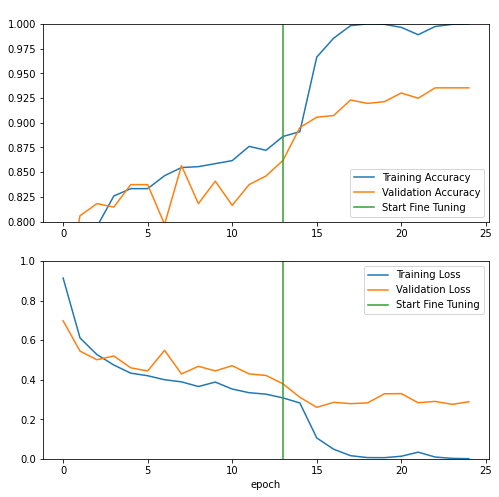

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model3.evaluate(test)
print('Test accuracy :', accuracy)

13/13 [==============================] - 93s 7s/step - loss: 1.8721 - accuracy: 0.8046
Test accuracy : 0.8045685291290283


In [ ]:
list_of_paths = ['/content/drive/MyDrive/New_Dataset/Testing/pituitary_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/no_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/meningioma_tumor/1.jpg',
                '/content/drive/MyDrive/New_Dataset/Testing/glioma_tumor/1.jpg']
test_tumor(list_of_paths,model3)

This image most likely belongs to pituitary_tumor with a 99.99 percent confidence.
This image most likely belongs to no_tumor with a 99.99 percent confidence.
This image most likely belongs to meningioma_tumor with a 100.00 percent confidence.
This image most likely belongs to meningioma_tumor with a 97.74 percent confidence.


In [ ]:
labels_entire = []
pred_entire = []
for image_batch,label_batch in test.as_numpy_iterator():
    prediction = model3.predict_on_batch(image_batch).flatten()

    # Apply a sigmoid since our model returns logits
    predictions = tf.nn.sigmoid(prediction).numpy()

    n = 0
    predict = []
    while n<=(predictions.shape[0]-4):
        pred = np.argmax(predictions[n:n+4]) #Returns the index of the largest element in the selected subarray
        n+=4
        pred_entire.append(pred)
    for el in label_batch:
        labels_entire.append(el)
pred_entire = np.array(pred_entire)
labels_entire = np.array(labels_entire)
print(pred_entire)
print(labels_entire)

[3 1 2 1 3 1 1 2 2 0 0 1 2 3 2 1 1 2 2 2 3 1 3 3 3 3 2 2 1 1 1 1 3 3 1 1 1
 0 1 3 2 2 2 2 1 2 2 1 1 3 2 2 2 1 3 0 2 1 1 0 1 2 2 0 1 2 1 1 1 3 3 3 3 2
 0 1 1 1 2 1 3 2 1 2 2 0 2 0 2 0 1 1 1 0 2 3 1 3 3 2 1 1 1 2 3 2 2 2 1 3 1
 1 3 2 1 1 2 2 3 3 1 1 0 2 3 1 1 2 3 3 2 1 3 2 1 1 1 2 2 1 1 3 2 1 1 1 2 2
 1 3 1 2 2 2 2 0 0 2 1 1 2 1 1 1 2 1 2 1 3 2 3 1 3 3 2 0 1 2 1 1 2 0 1 1 1
 2 1 0 1 3 2 2 1 2 3 1 1 2 1 1 1 0 2 2 2 1 1 1 2 1 1 2 2 1 3 2 1 2 2 1 3 1
 2 1 2 3 1 2 1 3 2 1 1 3 1 3 2 1 1 1 0 2 1 0 2 1 1 2 1 3 1 0 2 1 2 2 1 1 2
 1 3 1 3 0 1 2 1 2 0 2 1 2 0 1 0 2 1 1 1 1 1 1 1 2 2 1 0 2 1 3 3 2 1 0 1 1
 3 1 1 2 1 1 1 3 0 1 0 3 1 3 2 1 1 1 1 1 3 2 2 2 2 1 0 2 1 3 1 1 1 0 2 1 2
 2 2 2 1 3 1 3 1 2 1 2 3 1 2 1 1 1 2 2 2 1 3 1 1 1 2 1 1 1 1 3 2 1 1 1 2 3
 0 2 1 1 1 2 2 2 0 0 1 1 3 1 2 0 1 1 3 1 1 2 2 1]
[3 0 2 0 3 0 1 2 0 0 0 0 2 3 3 1 1 2 2 2 3 0 3 3 3 3 0 2 0 1 0 1 3 3 1 0 0
 0 1 3 0 2 2 2 1 2 2 0 1 3 0 2 3 0 3 0 2 1 0 0 0 2 2 0 1 3 1 1 1 3 3 3 3 2
 0 0 3 1 2 1 3 2 1 2 2 0 2 0 2 0 0 0 1 0 0 3 1 3 3

In [ ]:
labels_entire.shape
pred_entire.shape
print(classification_report(labels_entire, pred_entire, target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.35      0.52       100
meningioma_tumor       0.66      1.00      0.80       115
        no_tumor       0.85      0.99      0.91       105
 pituitary_tumor       1.00      0.85      0.92        74

        accuracy                           0.80       394
       macro avg       0.88      0.80      0.79       394
    weighted avg       0.86      0.80      0.78       394



In [ ]:
# Using k-fold cross validation

path_data
label_names = os.listdir(path_data)
label_names

final_csv = csv_builder(path_data,label_names)
final_csv

final_csv.to_csv('files_path.csv', header=None)
path_of_csv = './files_path.csv'
test_csv = csv_builder(path_test,label_names)
test_csv

test_csv = test_csv.sample(frac=1)
test_csv

k = 5

In [ ]:
num_classes = 4

model3 = tf.keras.Sequential([normalization_layer,
                                  conv_layer_32,
                                  max_pool,
                                  #layers.MaxPooling2D(pool_size=(2,2)),
                                  conv_layer_32,
                                  max_pool,
                                  #layers.MaxPooling2D(pool_size=(2,2)),
                                  layers.Flatten(),
                                  layers.Dense(128, activation='relu'),
                                  #layers.Dropout(0.25),
                                  layers.Dense(num_classes,activation='softmax')
                                 ])
model3.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
loss,acc,model3 = cross_validation(k,final_csv,test_csv,img_width,img_height,model3)
print(loss,acc)

Performing cross validation...
Found 394 validated image filenames belonging to 4 classes.
Found 2291 validated image filenames belonging to 4 classes.
Found 573 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


KeyboardInterrupt: ignored